**Breast Cancer Wisconsin (Diagnostic)**

This project has as objective to create a classification model to predict the class of a tumor (Malignant and Benign). 

**Problem Description**

The model of classification will be build based on the characteristics of the cell nuclei present in a set of images. The dataset is loaded from Scikit-Learn dataset, but we also find in [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) repository.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
type(cancer_data) # Cancer_data is a Bunch, it means a Pyton Dictionary.

sklearn.utils.Bunch

## Keys of the dictionary

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Dataset description

In [5]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Features names

In [6]:
print(cancer_data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Target names and values

In [7]:
print(cancer_data['target_names'])

['malignant' 'benign']


In [8]:
print(cancer_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Exploratory Data Analysis (EDA)

## Creating the Dataframe


In [9]:
cancer_df = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']], columns=np.append(cancer_data['feature_names'],['target']))
# Here, we employed np.c_ to joint the feature with the target, to assign the columns names we utilize np.append and we pass the respectives keys

### Visualizing the head, tail and some statistical informations about the dataframe

In [10]:
cancer_df.shape

(569, 31)

The dataset is composed by 569 instances and 31 columns. Each instance represents a cell nuclei. The columns are the features and target variable.

In [11]:
cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [12]:
cancer_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1.0
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1.0
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1.0
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0.0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1.0


In [13]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Visualizing some statistical informations

### Frequency of target variable

In [14]:
cancer_df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

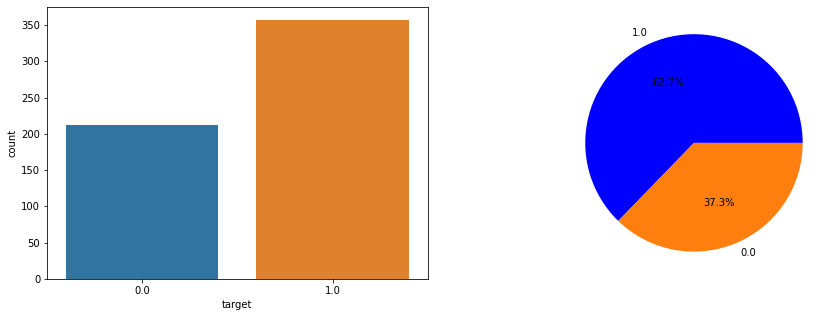

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=cancer_df['target'])
plt.subplot(1, 2, 2)
values = cancer_df.iloc[:, - 1].value_counts(normalize = True).values # to show the binirie values in parcentage
index = cancer_df.iloc[:, -1].value_counts(normalize = True).index
plt.pie(values, labels= index, autopct='%1.1f%%', colors=['b', 'tab:orange'])
plt.show()

### Histogram of numerical variables

Initially, the problem presents 10 attributes, but as was said in the dataset description

"The mean, standard error, and "worst" or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius."

In this manner, the scope of our analysis will be the mean values, but we are going to see some information about the standard error and worst values.

#### Histogram of numerical variables (mean values)

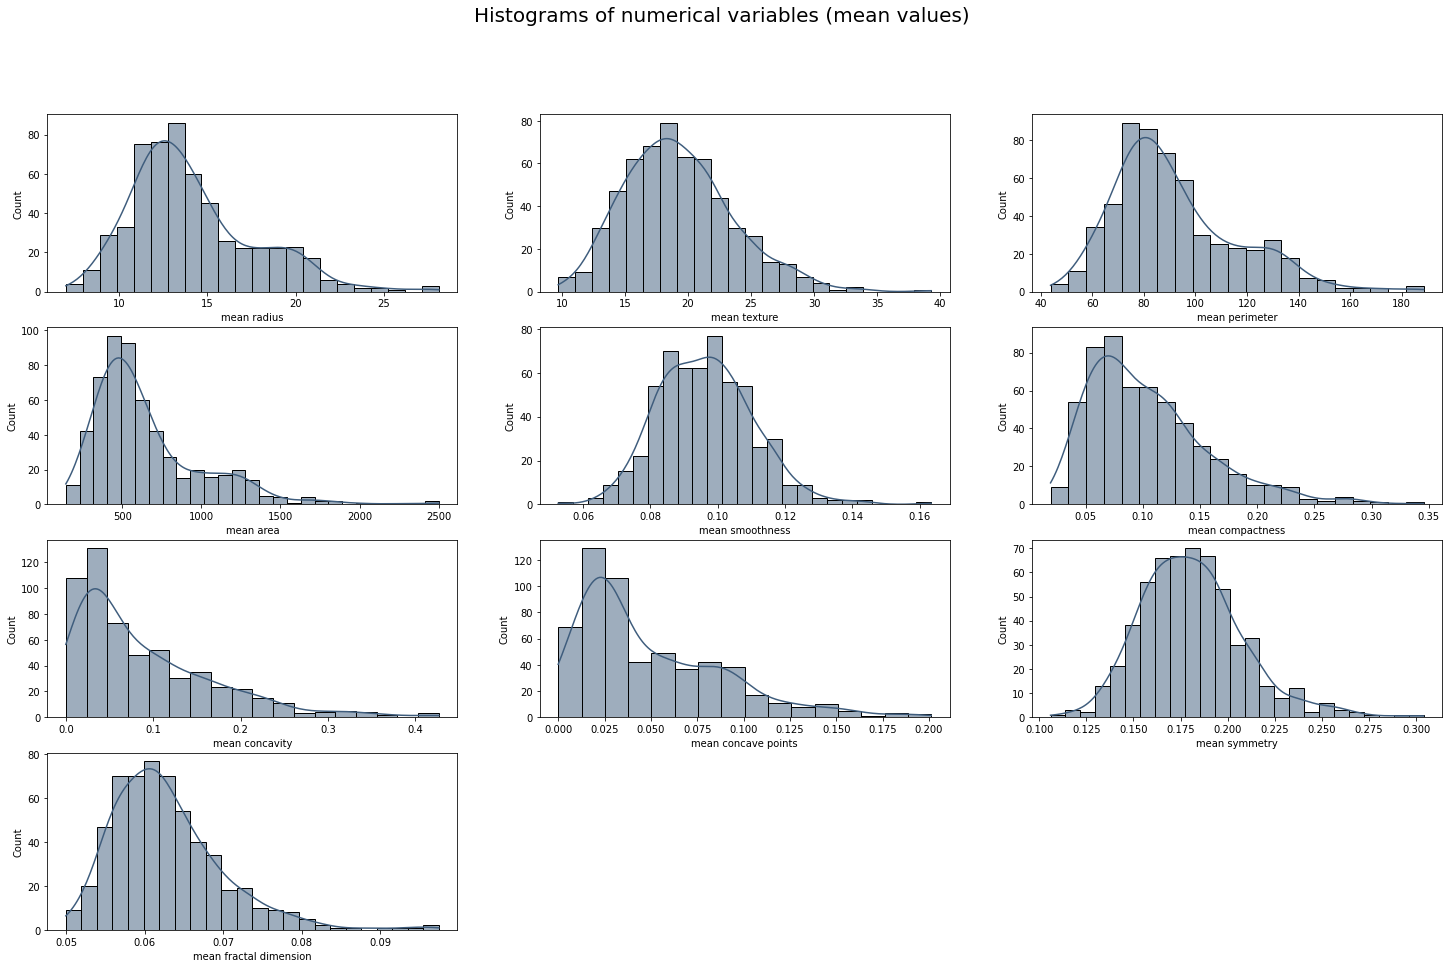

In [16]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (mean values)', fontsize = 20)
for i in range(1, 11):
    plt.subplot(4, 3, i)
    f = plt.gca()
    sns.histplot(cancer_df.iloc[:, i-1], color = '#3F5D7D', kde= True)
plt.show()

From the graphic above we can see that some variables seem to have a normal distribution. On the other side, other variables do not seem to have a normal distribution. To a more concise analysis, we must to see the distribution according with each class.

### Histogram of numerical variables according the target variables

#### Histogram of numerical variables according the target (Mean values)

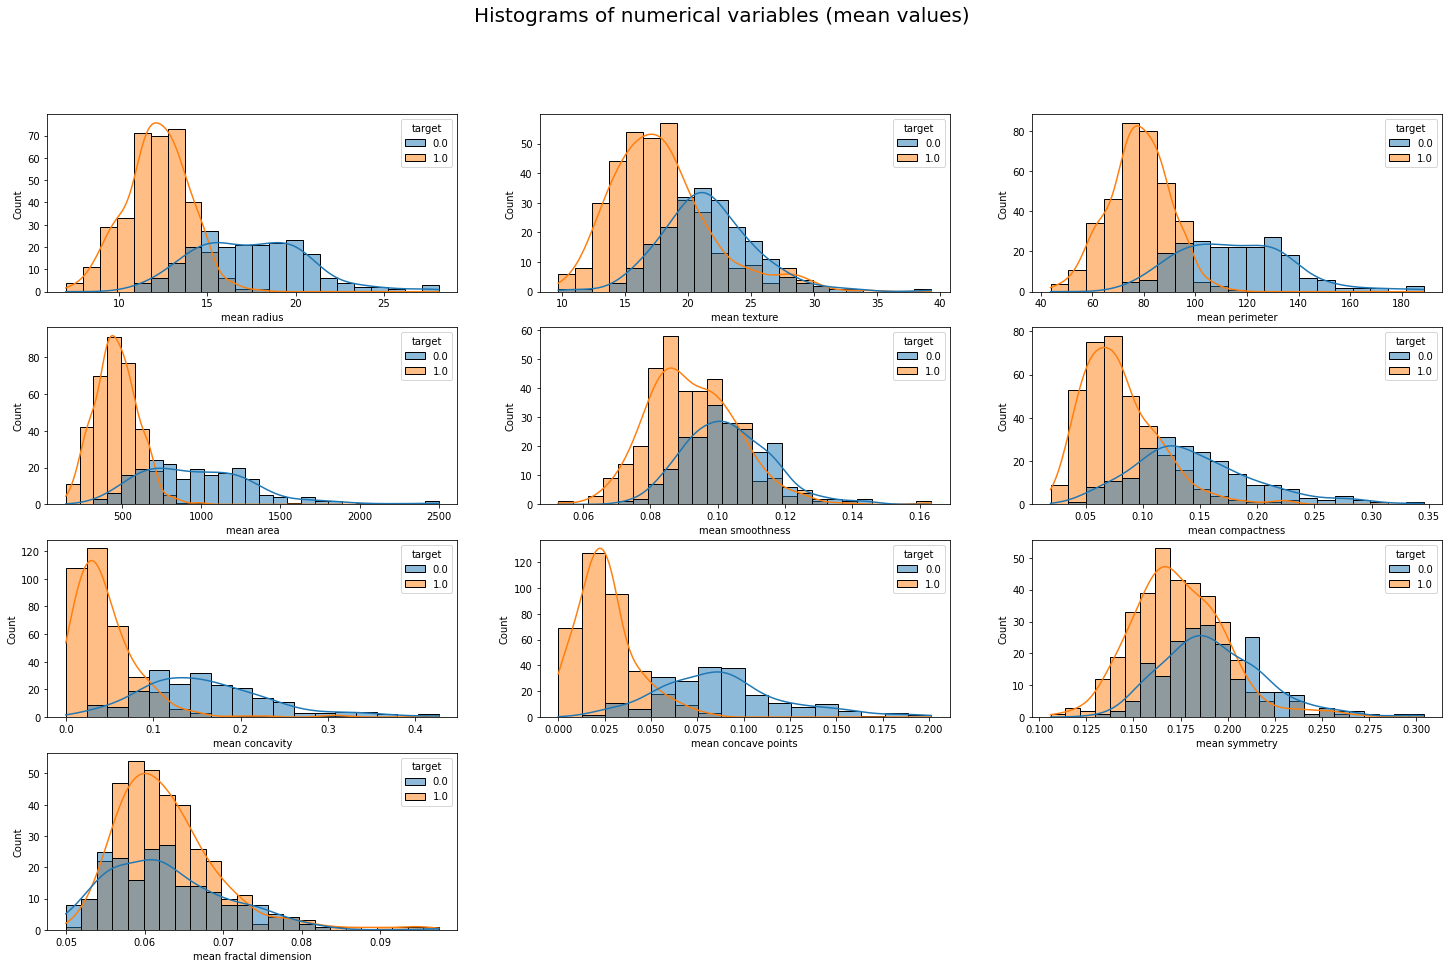

In [17]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (mean values)', fontsize = 20)
for i in range(1, 11):
    plt.subplot(4, 3, i)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)
plt.show()

The distributions show interesting aspects among the benign and malignant tumor. How we can see, the nuclei with malign tumor has a tendency to widen, presenting values more elevates to the radius, perimeter, area and other features. There are some features that their distribution are very close one each other, but  the considerable differences aforementioned will have an important role in the model construction.

Let's verify some mean values of these features which have a considerable difference in the  distribution to each class.

In [18]:
print('Mean Radius - Avarage')
print('\n')
print('- Benign')
print('Avarage of Mean Radius {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean radius'].mean()))
print('Standard Deviation of Mean Radius {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean radius'].std()))
print('- Malignant')
print('Avarage of Mean Radius {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean radius'].mean()))
print('Standard Deviation of Mean Radius {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean radius'].std()))
print('\n')
print('Mean Area - Avarage')
print('\n')
print('- Benign')
print('Avarage of Mean Area {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean area'].mean()))
print('Standard Deviation of Mean Area {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean area'].std()))
print('- Malignant')
print('Avarage of Mean Area {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean area'].mean()))
print('Standard Deviation of Mean Area {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean area'].std()))
print('\n')
print('Mean Concavity - Avarage')
print('\n')
print('- Benign')
print('Avarage of Mean Concavity {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean concavity'].mean()))
print('Standard Deviation of Mean Concavity {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean concavity'].std()))
print('- Malignant')
print('Avarage of Mean Concavity {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean concavity'].mean()))
print('Standard Deviation of Mean Concavity {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean concavity'].std()))
print('\n')
print('Mean Perimeter - Avarage')
print('\n')
print('- Benign')
print('Avarage of Mean Perimeter {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean perimeter'].mean()))
print('Standard Deviation of Mean Perimeter {:.2f}'.format(cancer_df[cancer_df['target'] == 1]['mean perimeter'].std()))
print('- Malignant')
print('Avarage of Mean Perimeter {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean perimeter'].mean()))
print('Standard Deviation of Mean Perimeter {:.2f}'.format(cancer_df[cancer_df['target'] == 0]['mean perimeter'].std()))

Mean Radius - Avarage


- Benign
Avarage of Mean Radius 12.15
Standard Deviation of Mean Radius 1.78
- Malignant
Avarage of Mean Radius 17.46
Standard Deviation of Mean Radius 3.20


Mean Area - Avarage


- Benign
Avarage of Mean Area 462.79
Standard Deviation of Mean Area 134.29
- Malignant
Avarage of Mean Area 978.38
Standard Deviation of Mean Area 367.94


Mean Concavity - Avarage


- Benign
Avarage of Mean Concavity 0.05
Standard Deviation of Mean Concavity 0.04
- Malignant
Avarage of Mean Concavity 0.16
Standard Deviation of Mean Concavity 0.08


Mean Perimeter - Avarage


- Benign
Avarage of Mean Perimeter 78.08
Standard Deviation of Mean Perimeter 11.81
- Malignant
Avarage of Mean Perimeter 115.37
Standard Deviation of Mean Perimeter 21.85


#### Histogram of numerical variables according the target (Standard error values)

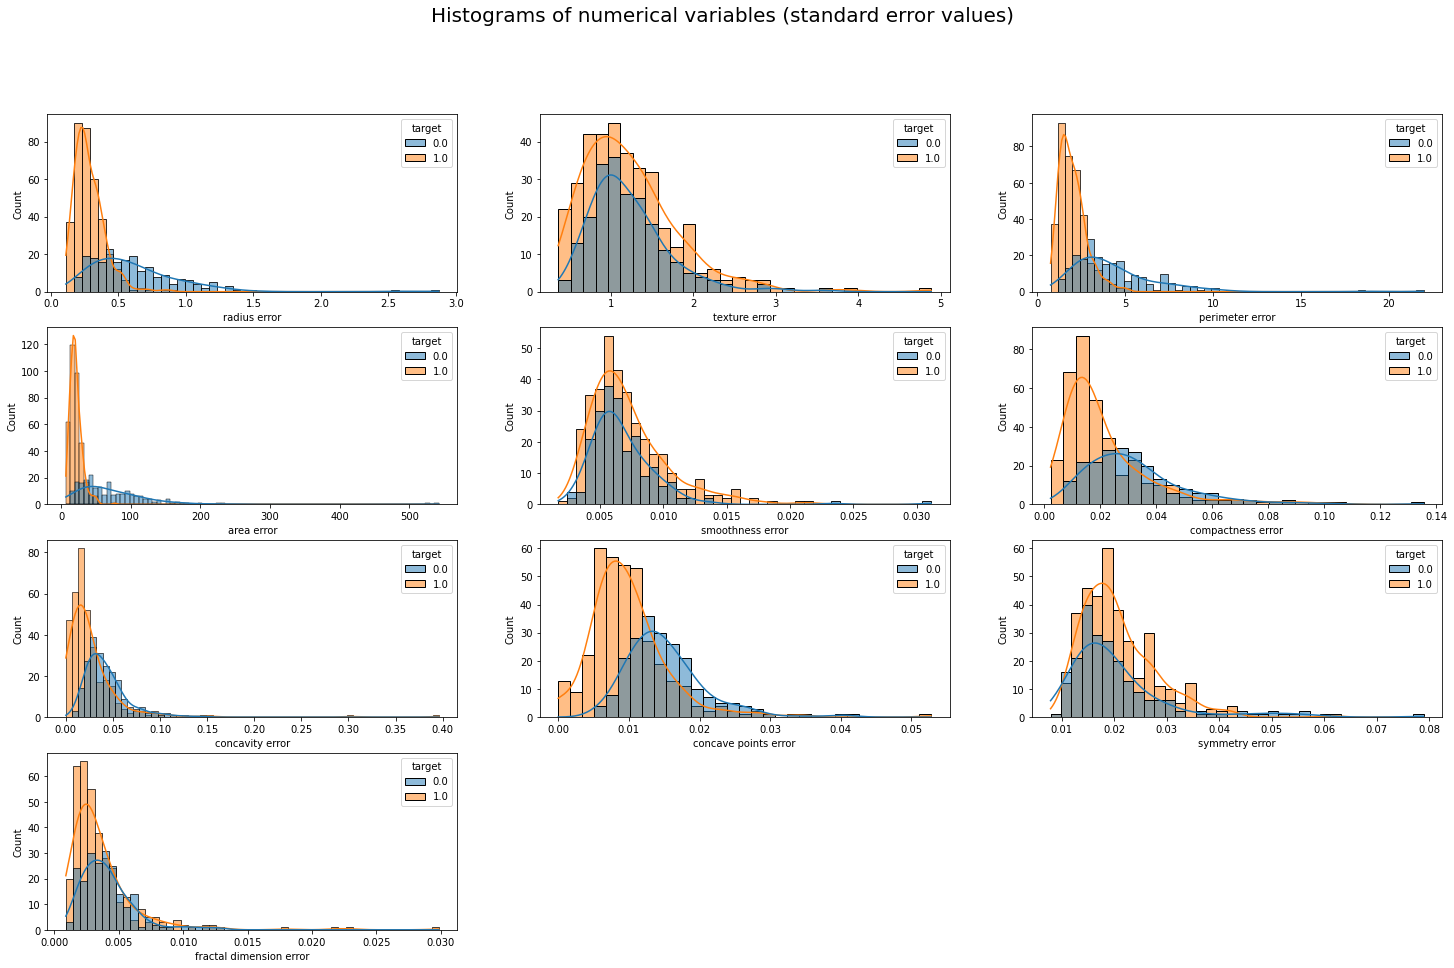

In [19]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (standard error values)', fontsize = 20)
for i in range(11, 21):
    plt.subplot(4, 3, i-10)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)
plt.show()

The distributions of the standard error values do nor require a big interpretation, since the error is a measure, it’s convenient that the feature distribution to each class been closely, fact which  indicates that the approximation to convert image into numerical value was good and reliable to each tumor class.

#### Histogram of numerical variables according the target (worst/largest values)

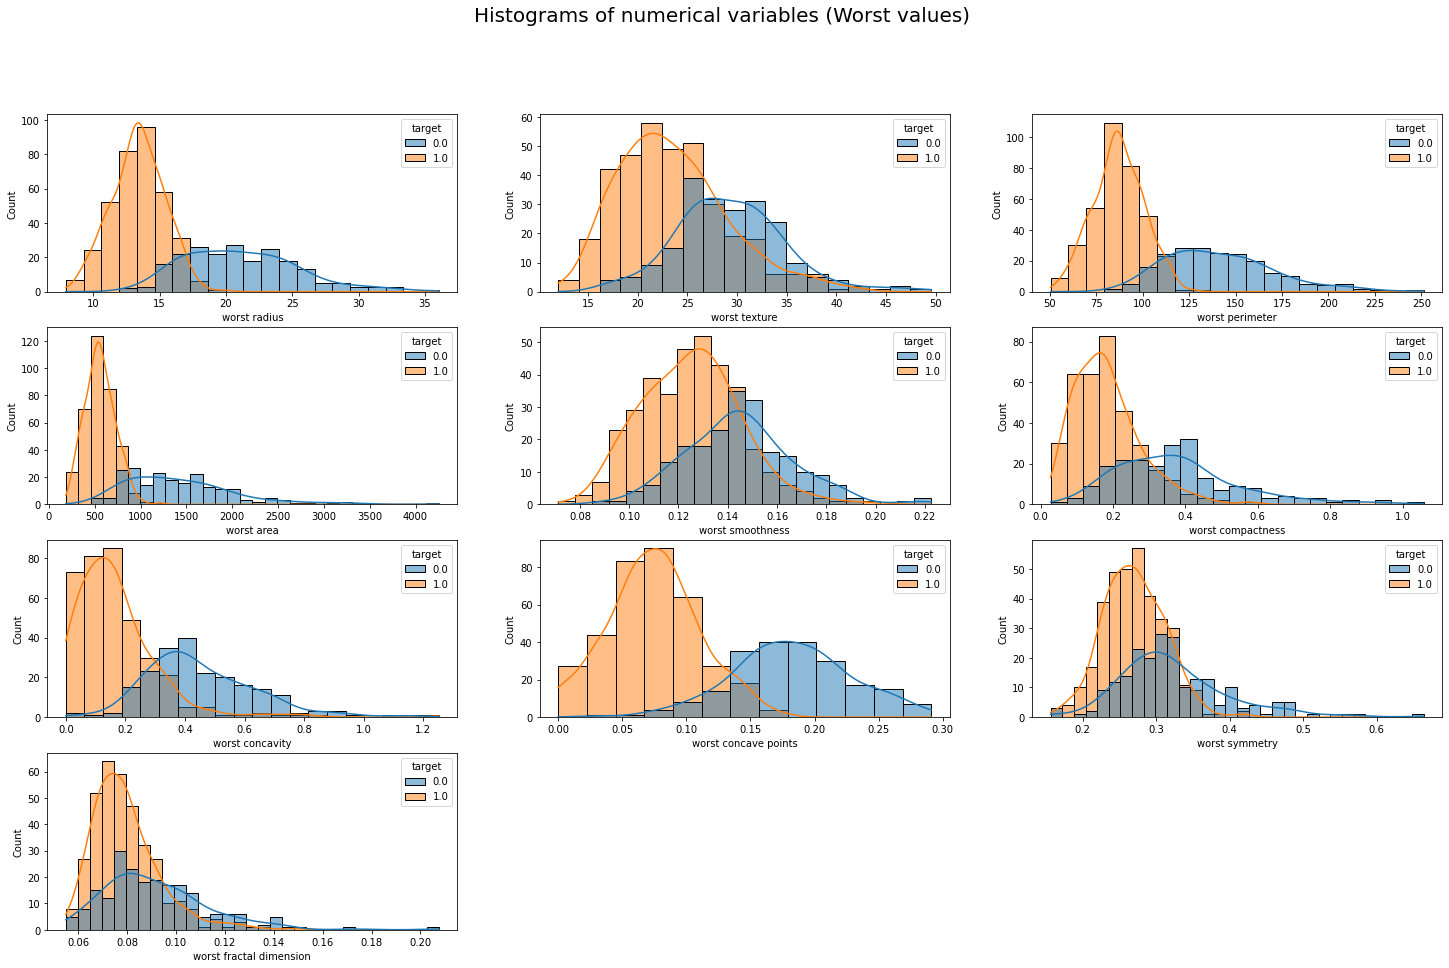

In [20]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables (Worst values)', fontsize = 20)
for i in range(21, 31):
    plt.subplot(4, 3, i-20)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)
plt.show()

For the worst values, the distribution to each feature seems the same of the mean values, showing considerable differences among the two tumor class. This is normal, since the worst value is taken in consideration to calculate the mean value.

### Correlations and Pair plot (scatter)

The correlation is an important measure to understand the relation between the variables. It’s very important to understand how each independent variable is correlated with the dependent variable, because it can indicates the importance of each independent variable. On the other hand, the correlation among the independent variables is also important, if we have independent variables highly correlated, one variable can change other, this fact can causes over fit. But for this problem, an highly correlation between the variables is normal, seen the geometric relationships between area, radius, perimeter, etc. 

The scatter plot is good way to verify these correlation among the features.

#### Correlation with the target variable (mean values)

Here, we look the correlation between the mean values features and target variable.

In [21]:
column_drop = [cancer_data.feature_names[i] for i in range(10, 30)] # List with unwanted columns
column_drop.append('target')

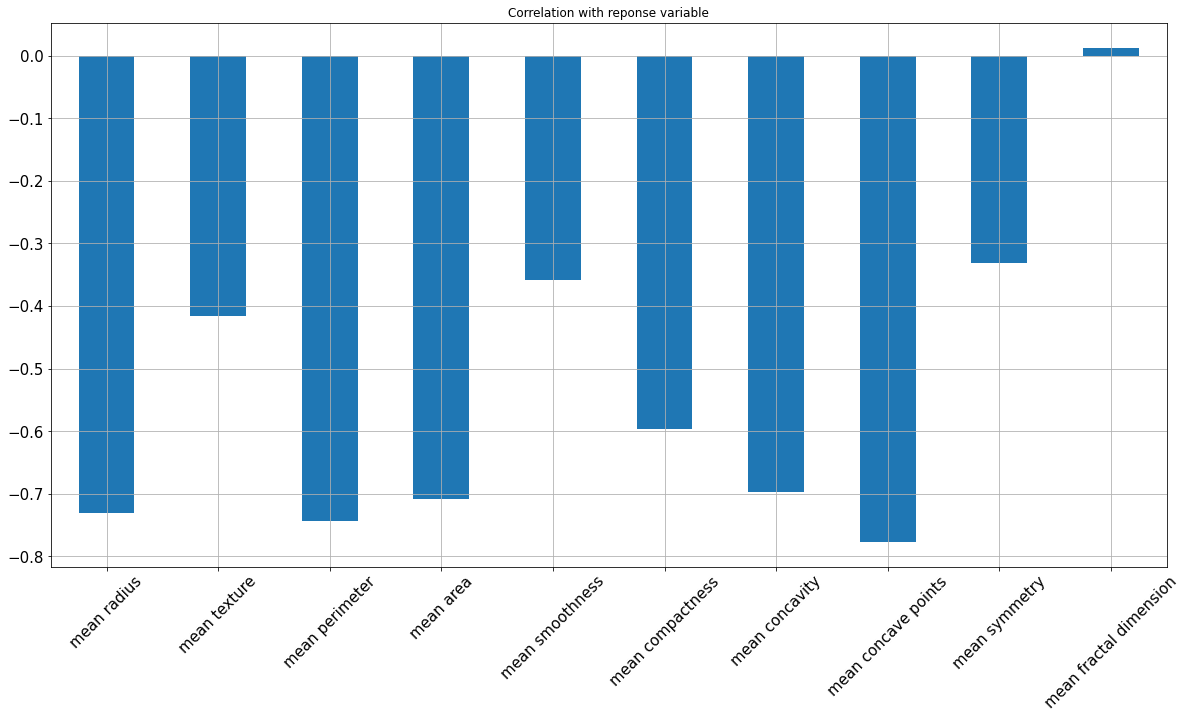

In [22]:
cancer_df.drop(columns=column_drop).corrwith(cancer_df.target).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True)

As we can see, all mean values have a strong correlation with the dependent variable. The negative correlation means that was taken in account just the class 1, we know that cell nuclei with benign tumor are more small. 

#### Matrix correlation between all variables (Overview)

Here, we have an overview of the correlation between all variables. It’s logical that we can see many variables highly correlated with others, especially variables with the same characteristics, for example, mean radius, standard error radius, worst radius show a strong correlation. In the last line we can see the correlation among the target variables, the standard error values and worst values. These values follow the same correlation which the mean values. All independent variables have a feature importance.

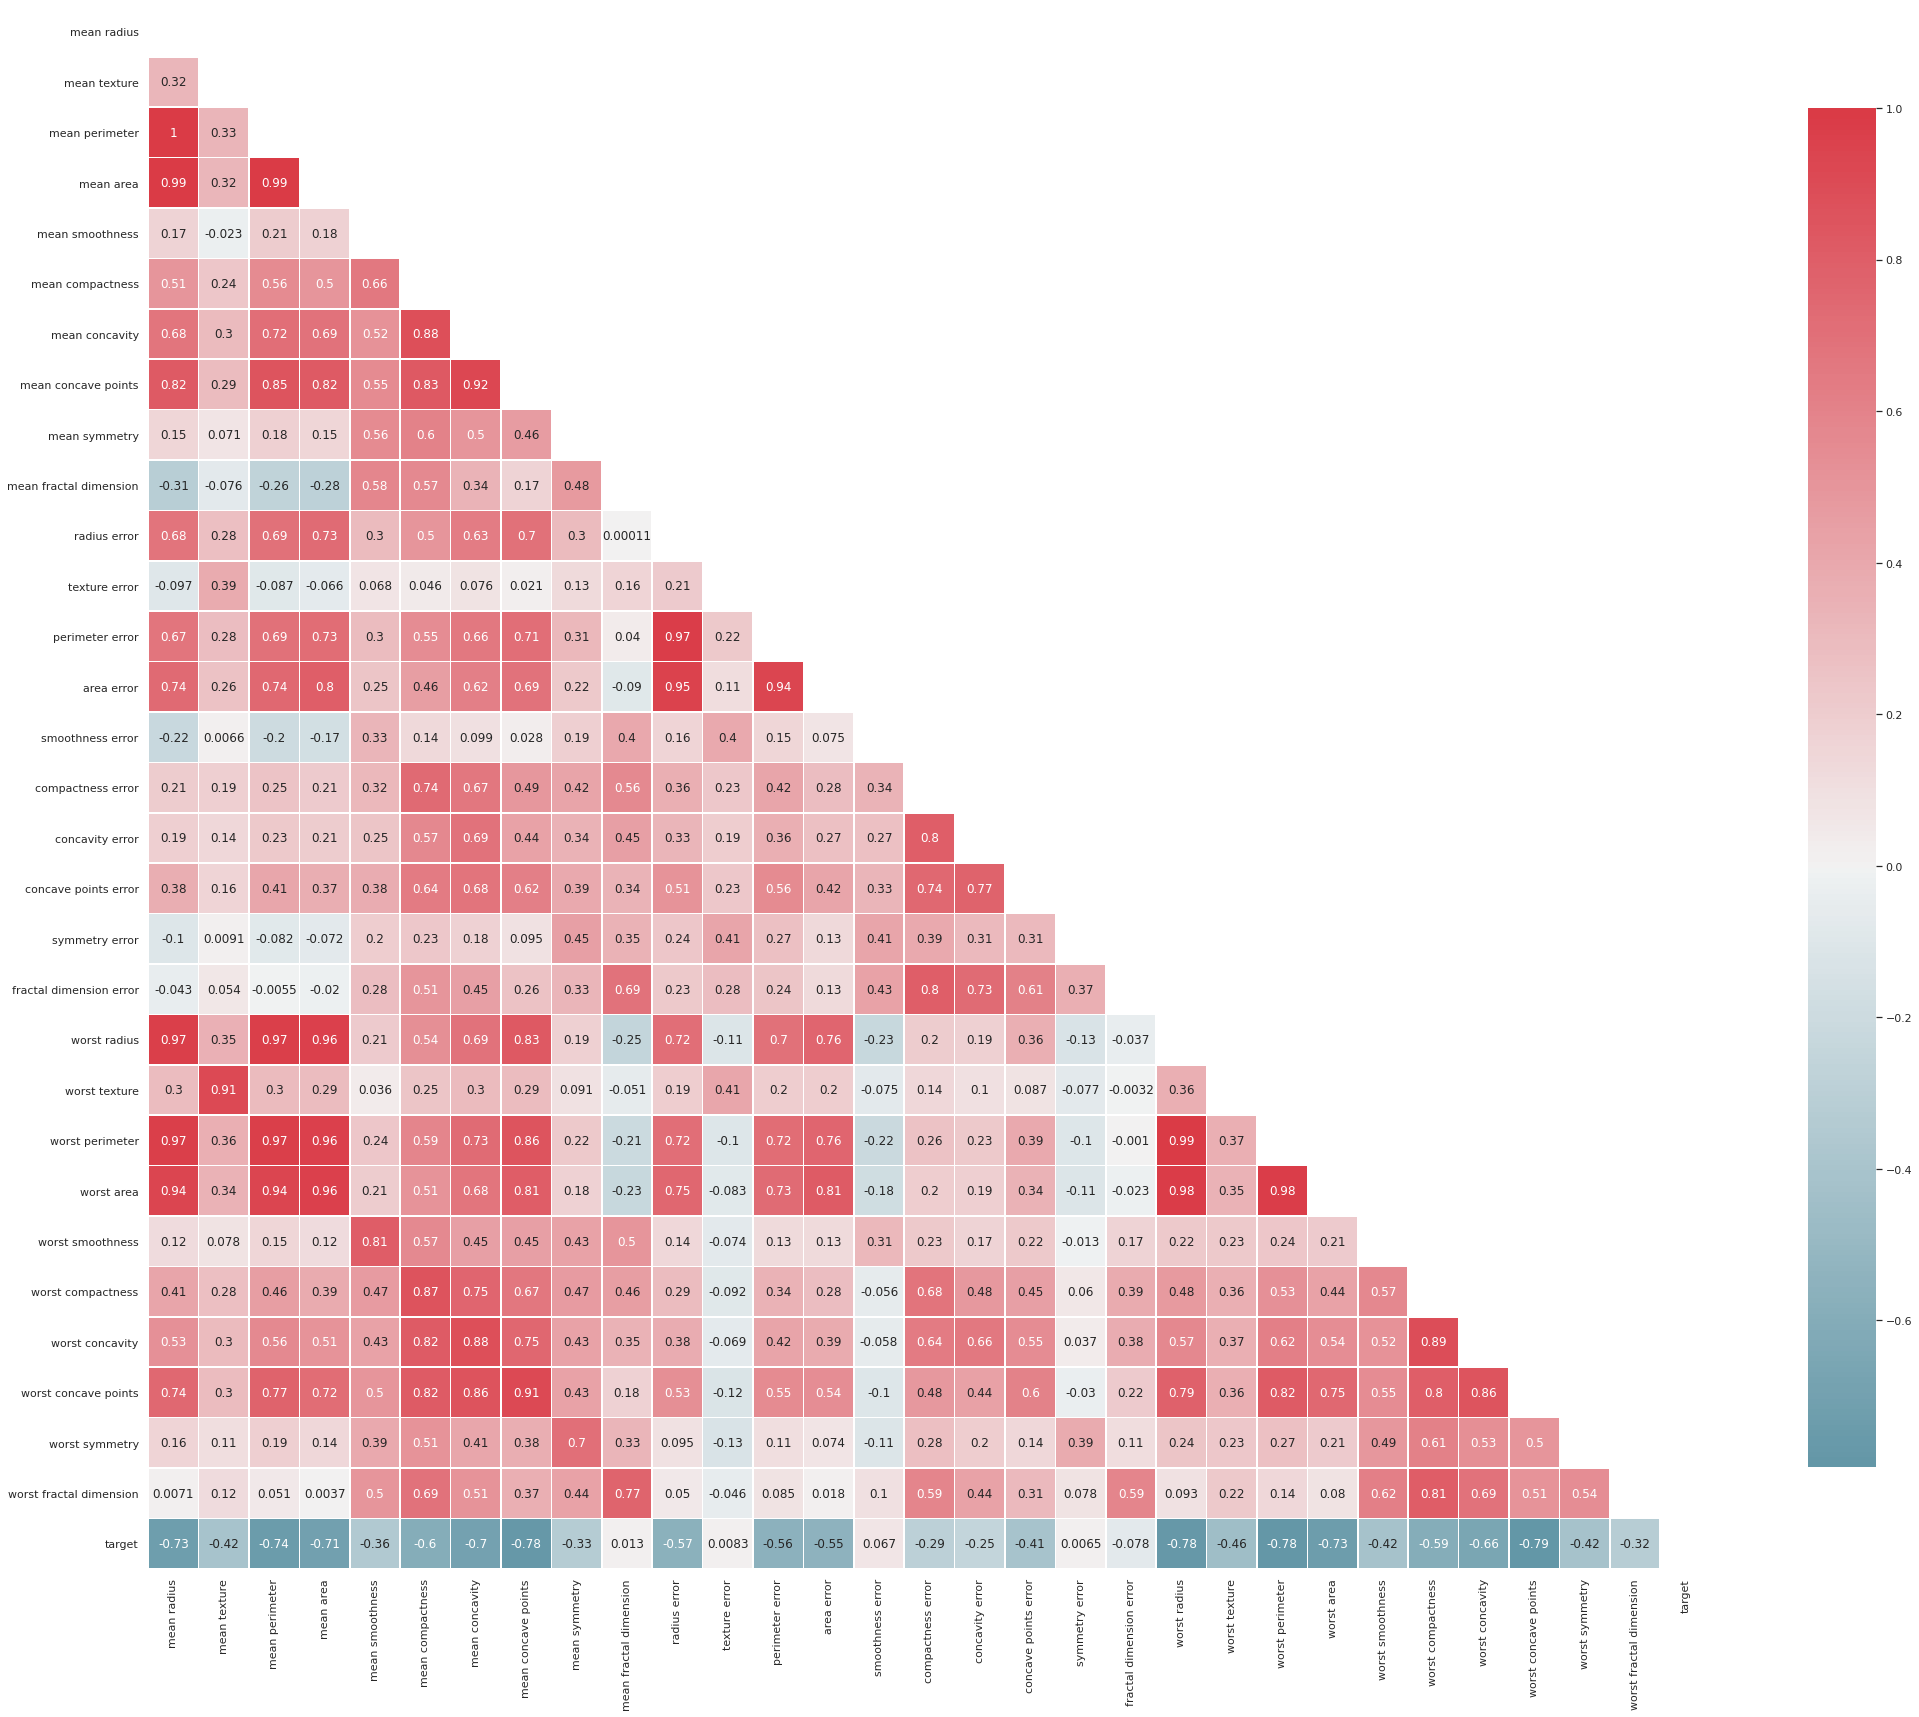

In [23]:
sns.set(style="white") # Setting the image style
corr = cancer_df.corr() # Creating the corralation 
mask = np.zeros_like(corr, dtype=np.bool) # Creating the triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 50)) # Creating the plot
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Setting the colors
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True) # Creating and setting the heatmap

##### Matrix correlation between independent variables (Means values) and pair plot (scatter)

In [24]:
columns_c = [cancer_df.columns[i] for i in range (0, 10)] # Creating a list with the desired columns

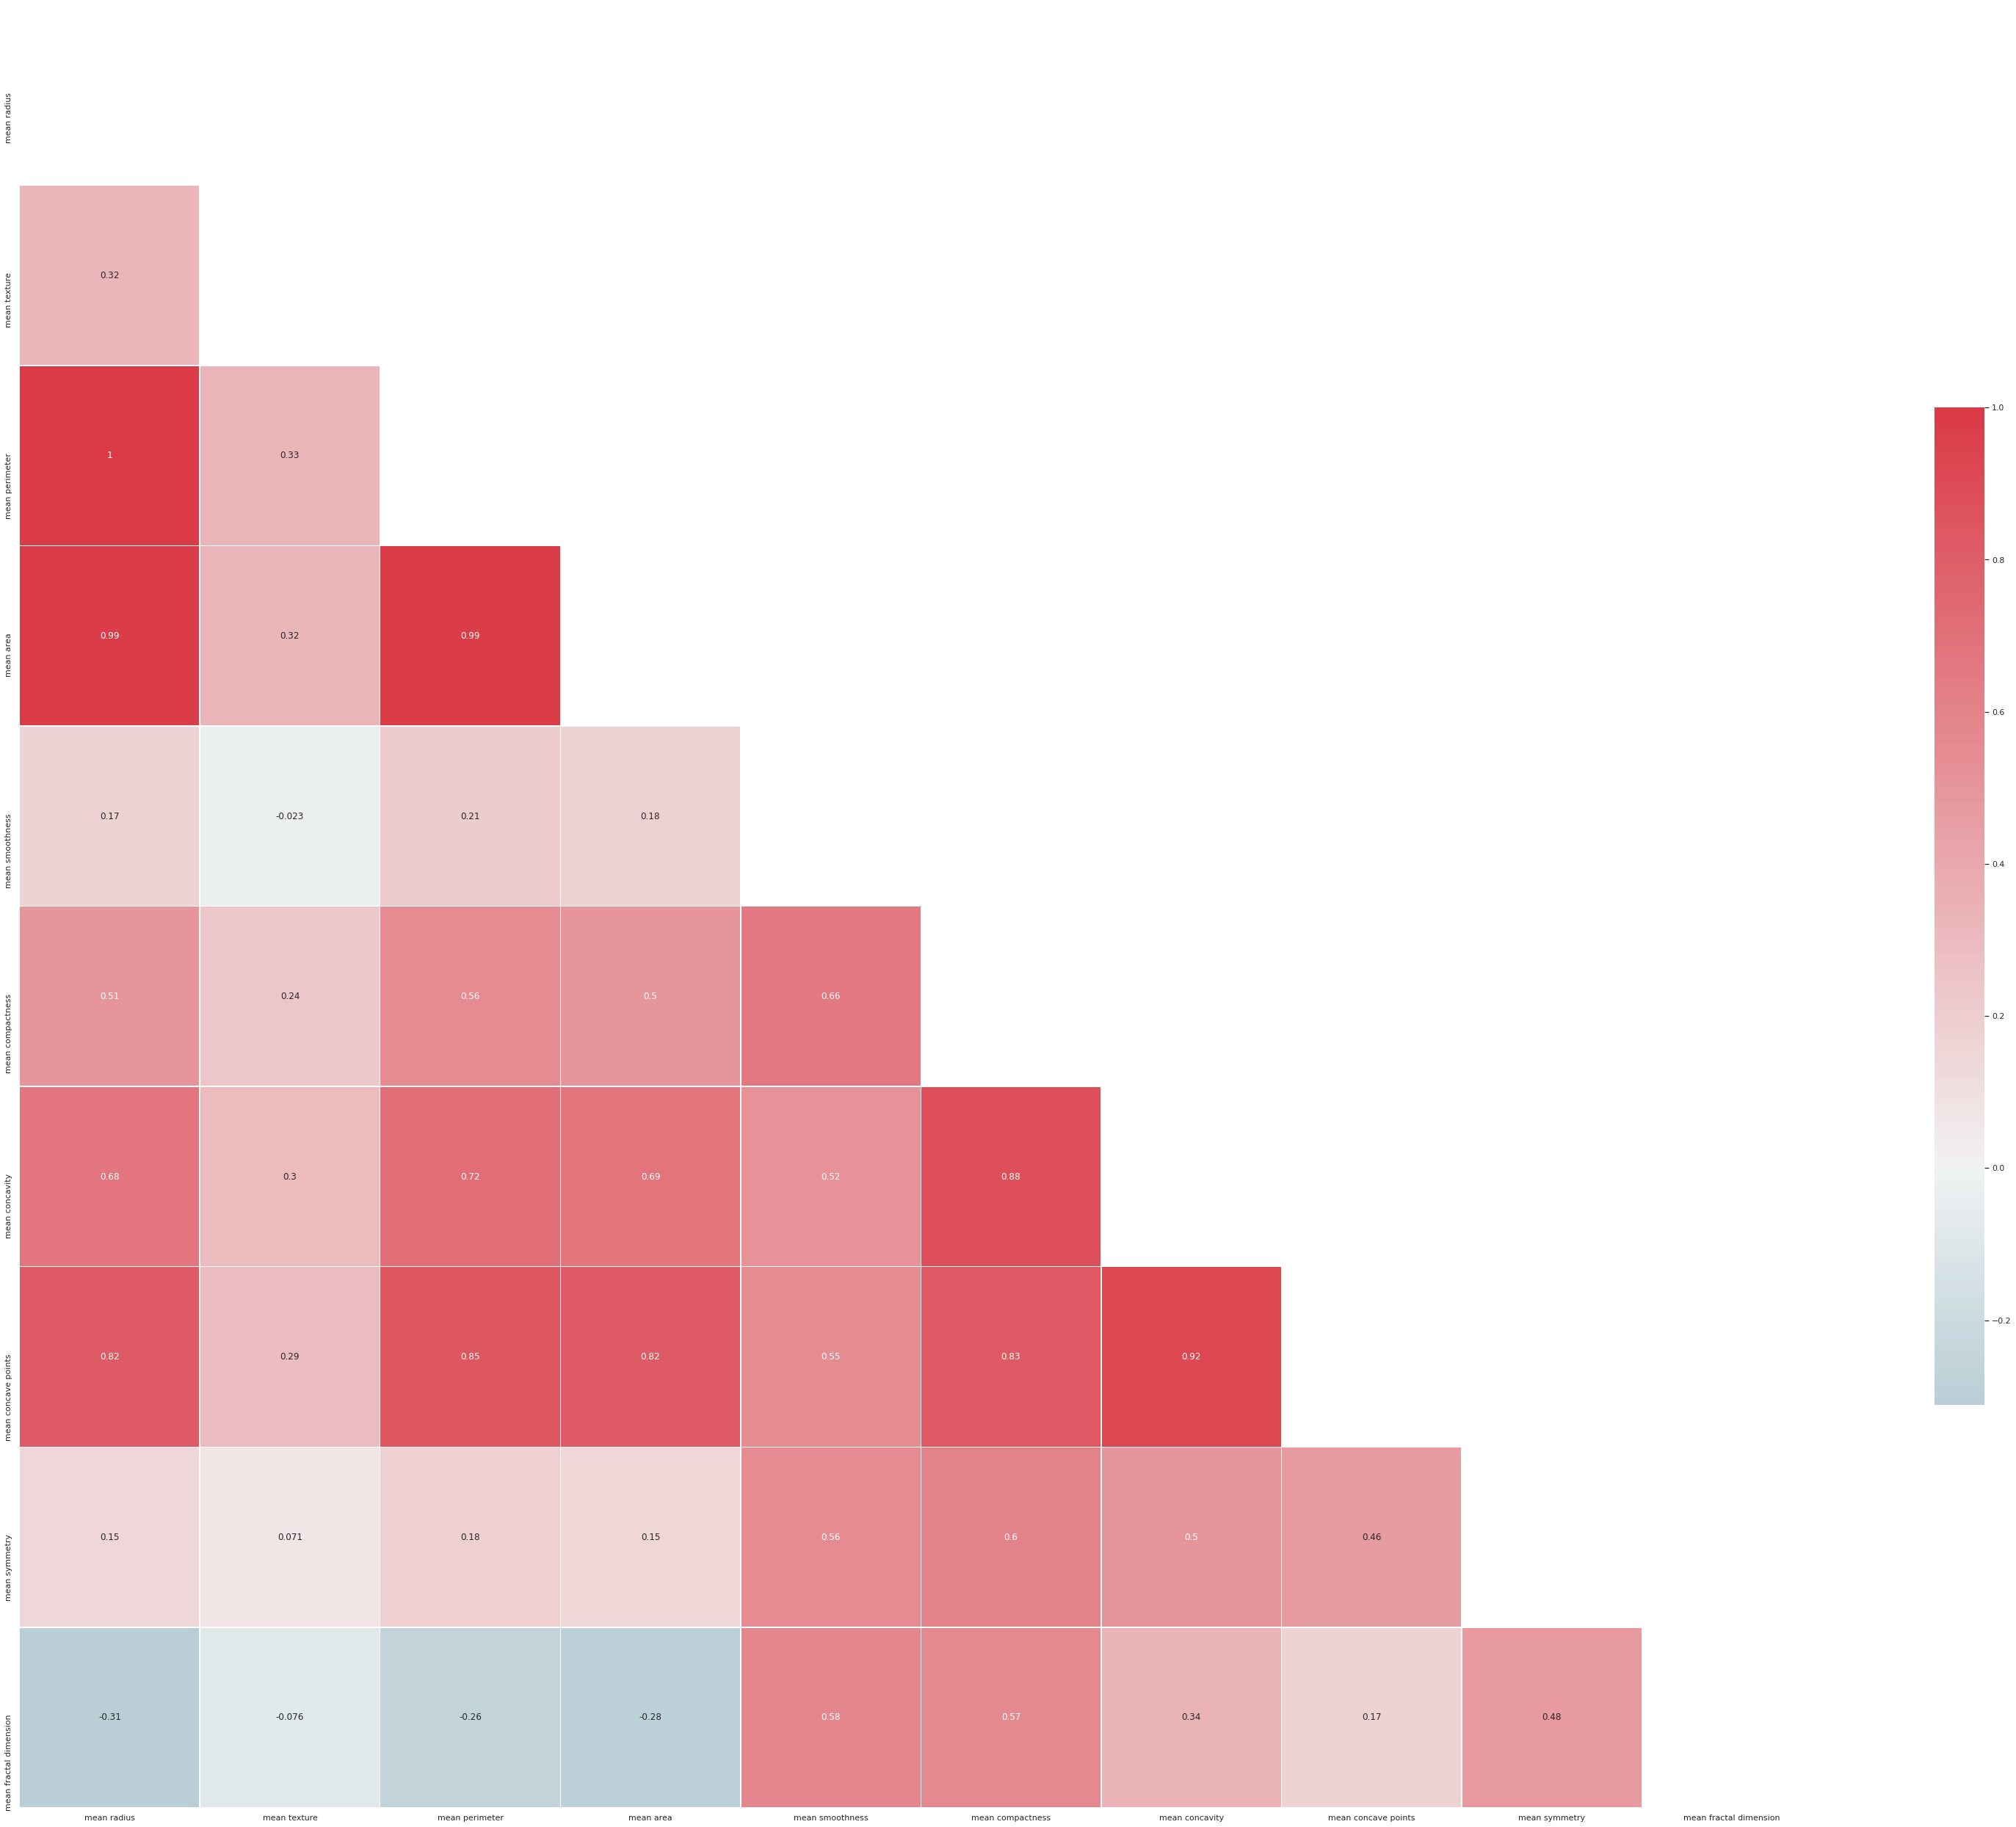

In [25]:
sns.set(style="white")
corr_1 = cancer_df[columns_c].corr()
mask = np.zeros_like(corr_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(55, 50))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

As expected, we can observe some variables with strong correlation. Normally, these variables show a linear dependence among them. It’s clear that if the radius of a nucleus grow the area will also grow, and so on with others variables. So, even if some variables are highly correlated, they will be important to model, because the size nucleus are deterministic to predict with a cell has a benign or malignant tumor.

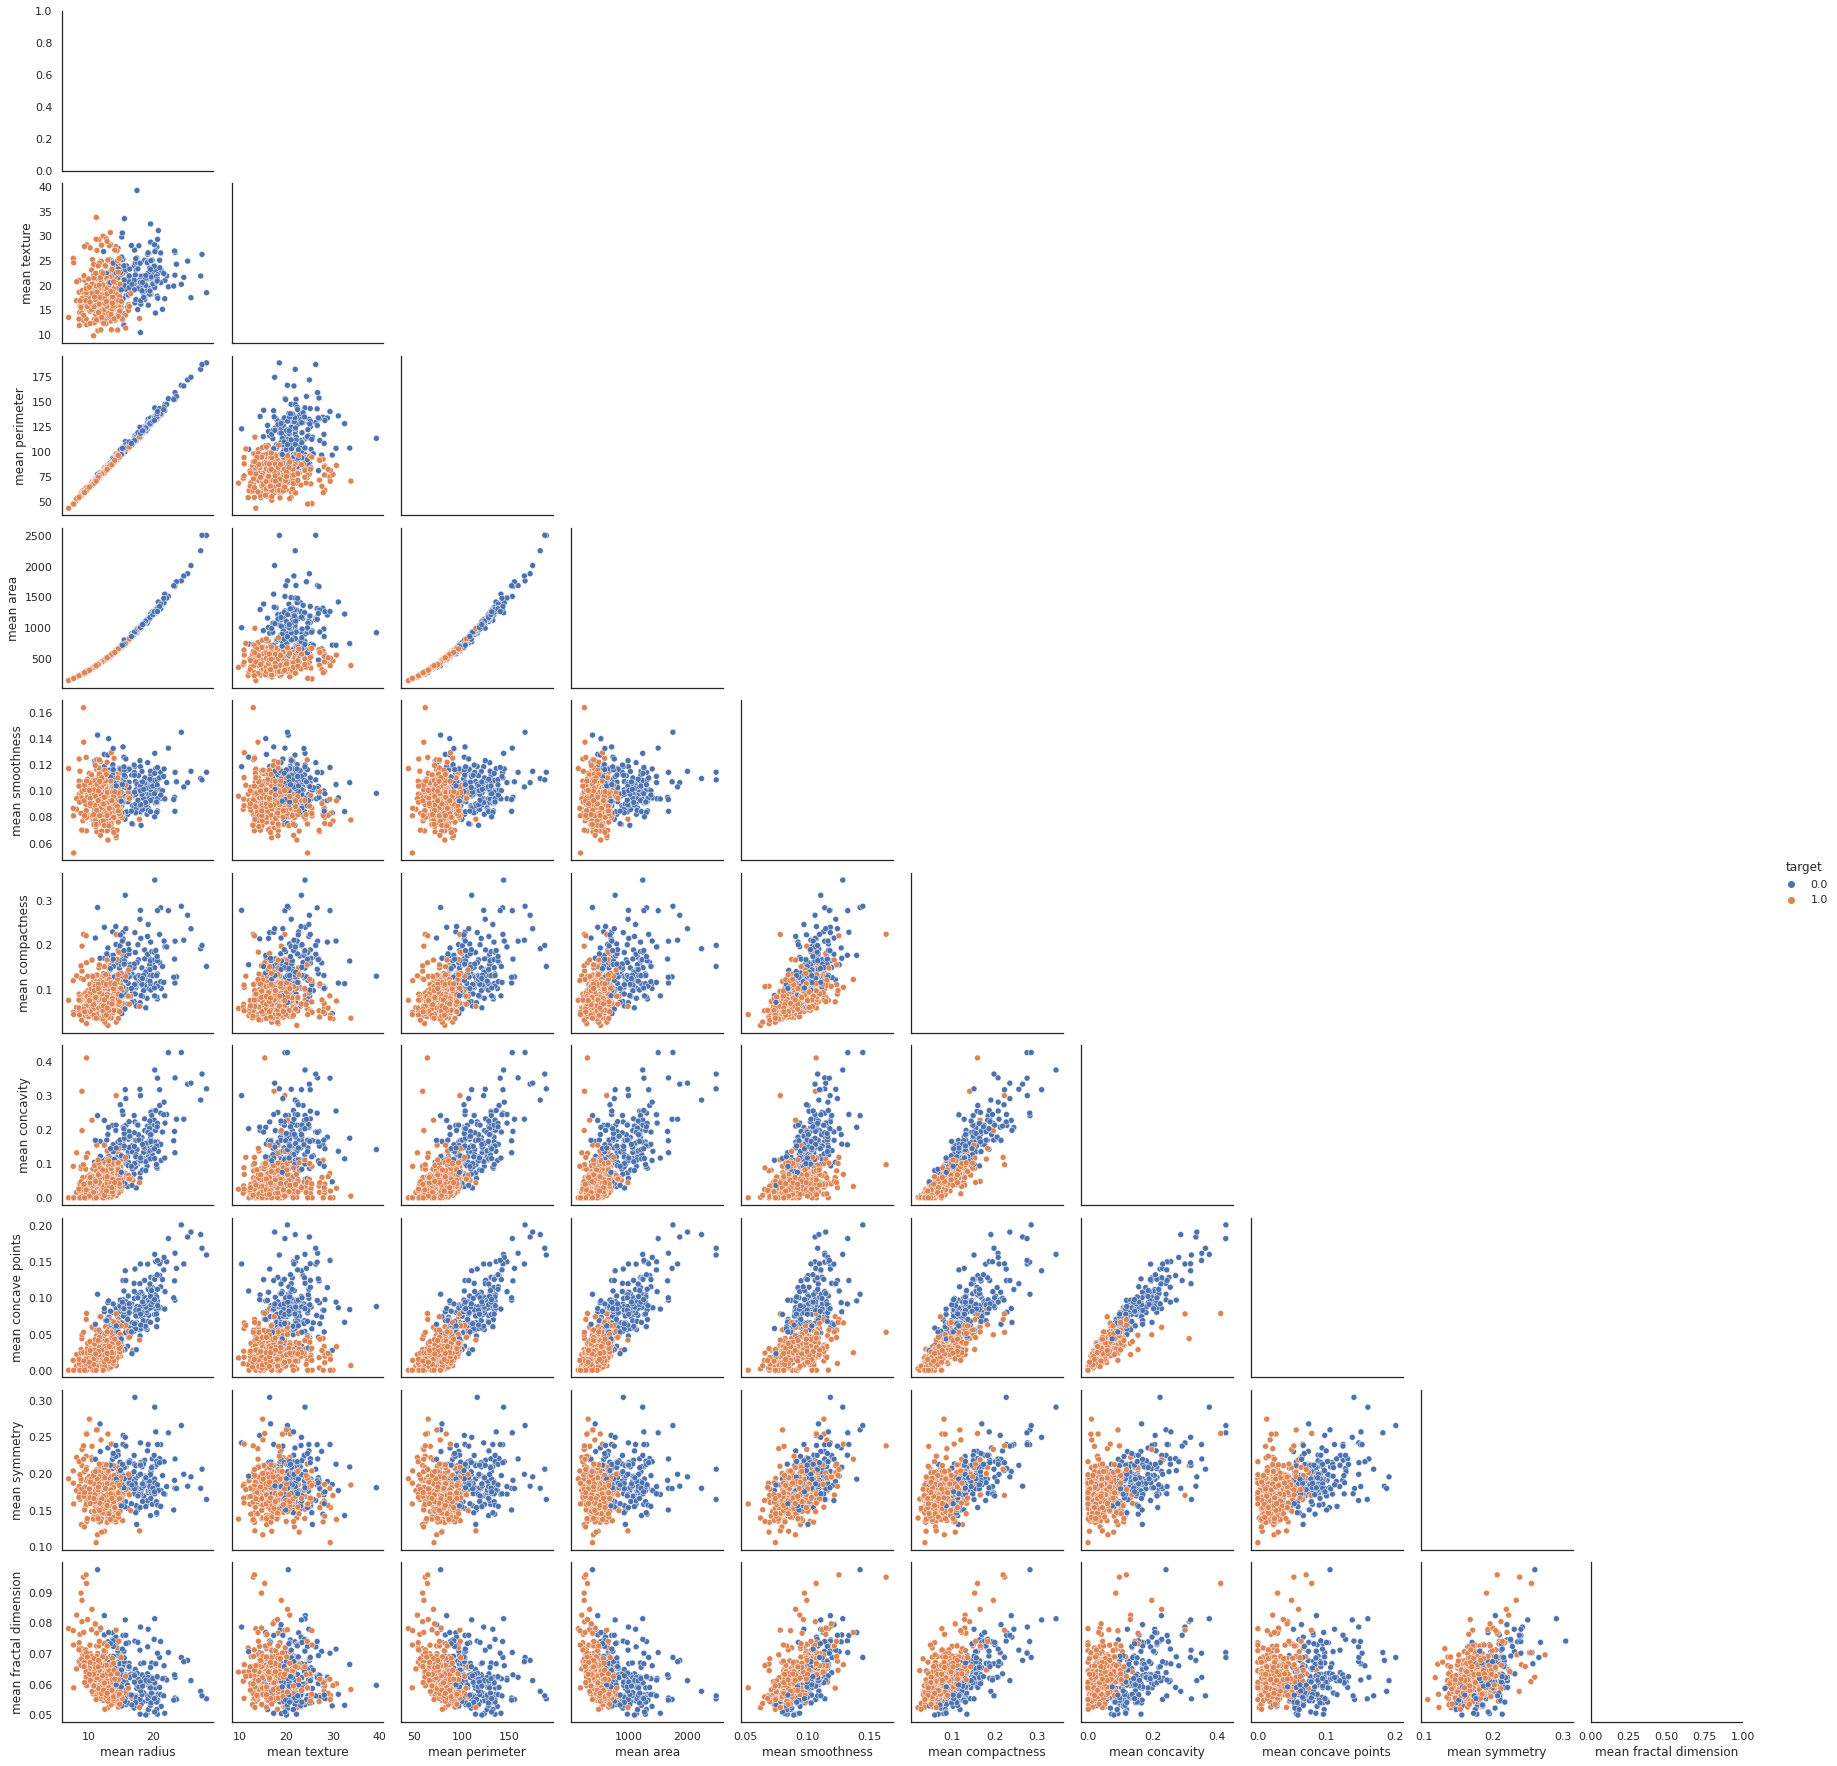

In [26]:
columns_c.append('target') # Here, we need to consider the target variable
sns.pairplot(cancer_df[columns_c], hue = 'target', kind = 'scatter', corner=True, diag_kind='None')

As we can see, the variables with strong correlation show a relation of dependence among them. We present a scatter plot of the most correlated variables.

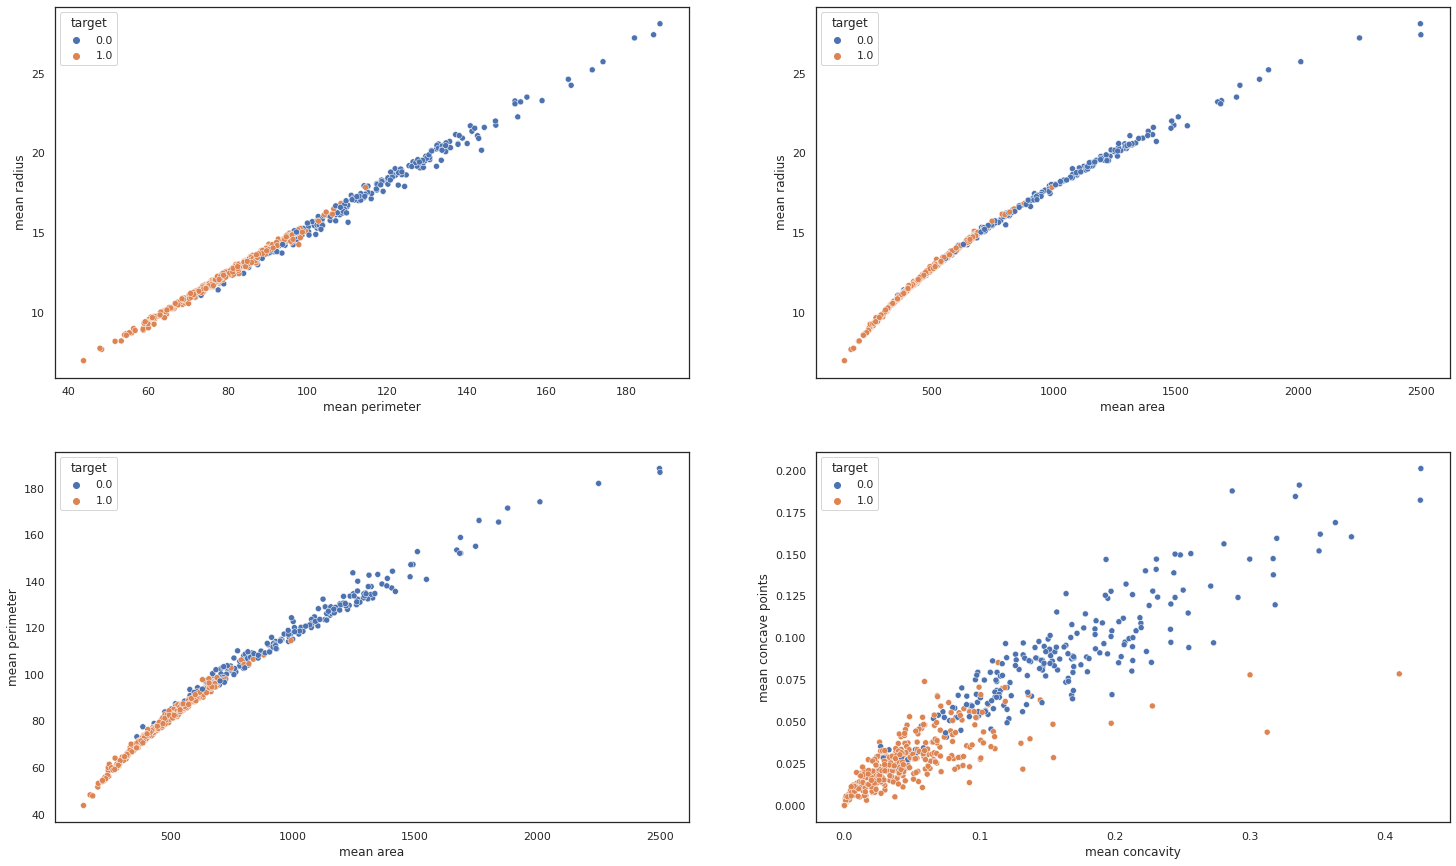

In [27]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'mean perimeter', y = 'mean radius', hue = 'target', data = cancer_df)
plt.subplot(2,2,2)
sns.scatterplot(x ='mean area' , y = 'mean radius', hue = 'target', data = cancer_df)
plt.subplot(2,2,3)
sns.scatterplot(x ='mean area' , y = 'mean perimeter', hue = 'target', data = cancer_df)
plt.subplot(2,2,4)
sns.scatterplot(x ='mean concavity' , y = 'mean concave points', hue = 'target', data = cancer_df)
plt.show()

## EDA conclusion

From the EDA we can conclude that all features have an important significance due to their strong correlation with the target variable. Besides the conclusion that the cell nuclei that have a malignant tumor have the tendency to widen. The size difference among the nuclei with benign and malignant tumor will be fundamental to the classification model. 

We are going to build the classification model considering all features. Here, we don't have to worry about dimension reducing.

# Building the Classification models

Here we are going to build some classification models to predict two class of tumor. Among the models we are going to choose the three models that give the best metrics scores with the cross validation and then, we are going to tune these model with the intuit to obtain the better classification model.

## Independent and Dependent Variables

In [28]:
X = cancer_df.drop(['target'], axis = 1)
y = cancer_df['target']

## Splitting the Dataset into Training and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training and Selection Model

### Training the model

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# K Nearest Nieghbors

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Kernel Support Vector Machine

from sklearn.svm import SVC
classifier3 = SVC(kernel='rbf', random_state=0)
classifier3.fit(X_train, y_train)

# Naïves Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(X_train, y_train)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier6.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting the test result

In [32]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)
y_pred6 = classifier6.predict(X_test)

### Selection Model

To select the best classification model, we consider some metrics as precision, recall, f1-score and accuracy. To verify with more precision, to each model we employ the cross validation. After the cross validation, we are going to choose the three best model to tune.

#### Metrics results without cross validation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)

print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine')
print(cm3)
print(classification_report(y_test,y_pred3))
print('\n')
print('Naive Bayes Classification')
print(cm4)
print(classification_report(y_test,y_pred4))
print('\n')
print('Decision Tree Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Random Forest Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')

Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[44  3]
 [ 2 65]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



K Nearest Neighbors
[[43  4]
 [ 0 67]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        47
         1.0       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Support Vector Machine
[[45  2]
 [ 0 67]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        47
         1.0       0.97      1.00      0.99     

In [34]:
from sklearn.metrics import SCORERS as SC # If you want to know all the metrics
SC.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

#### Cross validation and metrics scores

In [35]:
scoring = ['accuracy', 'precision', 'recall', 'f1'] # List of scores
from sklearn.model_selection import cross_validate
accuracies1 = cross_validate(estimator = classifier1, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies2 = cross_validate(estimator = classifier2, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies3 = cross_validate(estimator = classifier3, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies4 = cross_validate(estimator = classifier4, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies5 = cross_validate(estimator = classifier5, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies6 = cross_validate(estimator = classifier6, X = X_train, y = y_train, cv = 10, scoring = scoring)

print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies1['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies1['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies1['test_f1'].mean()*100))
print('\n')
print('K Nearest Neighbors')
print("Accuracy: {:.2f} %".format(accuracies2['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies2['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies2['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies2['test_f1'].mean()*100))
print('\n')
print('Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies3['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies3['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies3['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies3['test_f1'].mean()*100))
print('\n')
print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies4['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies4['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies4['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies4['test_f1'].mean()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies5['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies5['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies5['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies5['test_f1'].mean()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy: {:.2f} %".format(accuracies6['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies6['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies6['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies6['test_f1'].mean()*100))
print('\n')

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 97.81 %
Precision: 97.69 %
Recall: 98.97 %
F1-score: 98.30 %


K Nearest Neighbors
Accuracy: 96.49 %
Precision: 96.95 %
Recall: 97.59 %
F1-score: 97.25 %


Support Vector Machine
Accuracy: 97.59 %
Precision: 98.00 %
Recall: 98.28 %
F1-score: 98.11 %


Naive Bayes Classification
Accuracy: 94.96 %
Precision: 94.37 %
Recall: 97.93 %
F1-score: 96.11 %


Decision Tree Classification
Accuracy: 91.88 %
Precision: 93.00 %
Recall: 94.48 %
F1-score: 93.67 %


Random Forest Classification
Accuracy: 96.27 %
Precision: 96.65 %
Recall: 97.59 %
F1-score: 97.09 %




Here we select the three best score, we consider the accuracy and precicision score as selection criteria. The best models are

1.   Logistic Regression
2.   Support Vector Machine
3.   K-Nearest Neighbors

Now, we are going to tune the best models until here, to obtain a better classification model.

## Boosting the model

The final step to select our model is to boost the hyper parameters using GridSearchCV. Each parameter will be trained with the cross validation.

### Setting the parameters 

In [36]:
param_grid1 = {'C' : [0.001, 0.01, 0.1, 1 , 10, 100], 'solver' : ['newton-cg', 'sag', 'saga','lbfgs' ], 'max_iter' : [10000]} # Hyper-parameters Logistic Regression
param_grid2 = {'C': [0.1, 1, 10, 100], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001], 'degree': [2, 4, 6], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} # Hyper-parameters Support Vector Machine
param_grid3 = {'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1, 2], 'metric' : ['euclidean', 'manhattan', 'minkowski']} # Hyper-parameters SKNN

### Searching the best parameters and training the models

In [ ]:
metrics = {'ACC' : 'accuracy', 'PC' : 'precision', 'REC' : 'recall', 'F1' : 'f1'}
from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier1, param_grid1, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)
grid2 = GridSearchCV(classifier3, param_grid2, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)
grid3 = GridSearchCV(classifier2, param_grid3, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)

# Traing the models with the best parameters

class_boost_1 = grid1.fit(X_train,y_train)
class_boost_2 = grid2.fit(X_train,y_train)
class_boost_3 = grid3.fit(X_train,y_train)

### Predicting with the best parameters

In [38]:
boost_predictions1 = class_boost_1.predict(X_test)
boost_predictions2 = class_boost_2.predict(X_test)
boost_predictions3 = class_boost_3.predict(X_test)

### Metrics scores and the best parameters

#### Logistic Regression Boosted

Logistic Regression Classification - Boosted


Best Parameters
{'C': 1, 'max_iter': 10000, 'solver': 'newton-cg'}
Confusion Matrix


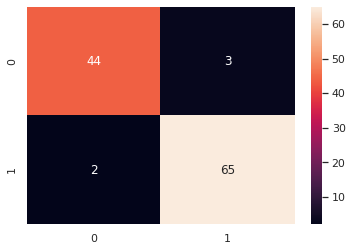

Metrics Results
- Accuracy: 97.81 %
- Precision: 94.70 %
- Recall: 98.68 %
- F1-score: 96.54 %




In [39]:
print('Logistic Regression Classification - Boosted')
print('\n')
print('Best Parameters')
print(grid1.best_params_)
print('Confusion Matrix')
cmb1 = confusion_matrix(y_test, boost_predictions1)
plt.plot()
sns.heatmap(cmb1, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid1.cv_results_['mean_test_ACC'][grid1.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid1.cv_results_['mean_test_PC'].mean()*100))
print("- Recall: {:.2f} %".format(grid1.cv_results_['mean_test_REC'].mean()*100))
print("- F1-score: {:.2f} %".format(grid1.cv_results_['mean_test_F1'].mean()*100))
print('\n')



#### Support Vector Machine Boosted

Support Vector Machine - Boosted


Best Parameters
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Confusion Matrix


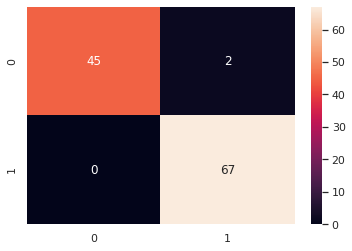

Metrics Results
- Accuracy: 98.03 %
- Precision: 86.61 %
- Recall: 95.76 %
- F1-score: 90.25 %




In [40]:
print('Support Vector Machine - Boosted')
print('\n')
print('Best Parameters')
print(grid2.best_params_)
print('Confusion Matrix')
cmb2 = confusion_matrix(y_test, boost_predictions2)
plt.plot()
sns.heatmap(cmb2, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid2.cv_results_['mean_test_ACC'][grid2.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid2.cv_results_['mean_test_PC'].mean()*100))
print("- Recall: {:.2f} %".format(grid2.cv_results_['mean_test_REC'].mean()*100))
print("- F1-score: {:.2f} %".format(grid2.cv_results_['mean_test_F1'].mean()*100))
print('\n')

#### KNN Boosted

K-Nearest Neighbors - Boosted


Best Parameters
{'algorithm': 'auto', 'metric': 'manhattan', 'p': 1, 'weights': 'uniform'}
Confusion Matrix


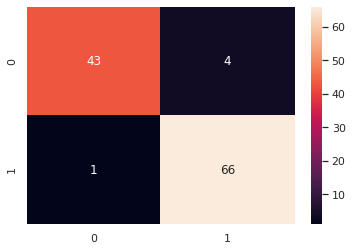

Metrics Results
- Accuracy: 96.705 %
- Precision: 96.797 %
- Recall: 97.931 %
- F1-score: 97.340 %




In [41]:
print('K-Nearest Neighbors - Boosted')
print('\n')
print('Best Parameters')
print(grid3.best_params_)
print('Confusion Matrix')
cmb3 = confusion_matrix(y_test, boost_predictions3)
plt.plot()
sns.heatmap(cmb3, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.3f} %".format(grid3.cv_results_['mean_test_ACC'][grid3.best_index_].mean()*100))
print("- Precision: {:.3f} %".format(grid3.cv_results_['mean_test_PC'].mean()*100))
print("- Recall: {:.3f} %".format(grid3.cv_results_['mean_test_REC'].mean()*100))
print("- F1-score: {:.3f} %".format(grid3.cv_results_['mean_test_F1'].mean()*100))
print('\n')

# Conclusion

In this notebook we had built a classification model to predict two possibles class of tumor in a nucleus cell. The results are very satisfactory, with great metrics scores. For this problem, we have two model that was tuned and give good responses. According with accuracy metric, the best model is Support Vector Machine, $accuracy = 98.03\%$. On the other hand, we have the Logistic Regression which has a satisfactory accuracy $97.81\%$. Moreover, the Logistic Regression model has the best scores for Precision, Recall and F1-score, this fact must be taken account to select the best model.

In general, we were able to create good models to predict a class of a tumor. We also were able to understand the nature of the problem by the EDA, fact that aided to build an accurate model. In the war against the cancer, machine learning algorithms can be a good tool to make previous analyzes, in this way, help with antecedence the treatment.